<a href="https://colab.research.google.com/github/talha1503/Multi-Label-Classification/blob/master/Multi_Label_StackOverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
header = ['Questions','python','css','java','web-scraping','git','javascript','reactjs','node.js','jquery','php','flask']
data = pd.read_csv('drive/My Drive/Datasets/dataset.csv',names=header)
data.head()

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,Questions\t%python\t%20css\t%20java\t%20web-sc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,How do I redirect to another webpage?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,How do I check if an element is hidden in jQuery?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,How do I return the response from an asynchron...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,“Thinking in AngularJS” if I have a jQuery bac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
data.drop(data.index[0],inplace=True)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)   #shuffling the data
data.head()

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,jQuery Ajax request inside Ajax request not wo...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,all image object changing in one css after click,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Error while pushing to Heroku: Cannot find mod...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Scraping data from all asp.net pages with AJAX...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,How do I remove a particular element from an a...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100042 entries, 0 to 100041
Data columns (total 12 columns):
Questions       100042 non-null object
python          100042 non-null float64
css             100042 non-null float64
java            100042 non-null float64
web-scraping    100042 non-null float64
git             100042 non-null float64
javascript      100042 non-null float64
reactjs         100042 non-null float64
node.js         100042 non-null float64
jquery          100042 non-null float64
php             100042 non-null float64
flask           100042 non-null float64
dtypes: float64(11), object(1)
memory usage: 9.2+ MB


In [7]:
data.fillna(0)

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,jQuery Ajax request inside Ajax request not wo...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,all image object changing in one css after click,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Error while pushing to Heroku: Cannot find mod...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Scraping data from all asp.net pages with AJAX...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,How do I remove a particular element from an a...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100037,Callback with jQuery .get() function,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
100038,How to pass props to a React Component at the ...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
100039,RESTEasy client API file upload to python/Flask,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100040,Remove empty array elements,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data.describe()

,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
count,100042.0,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000
mean,0.0,0.375002,0.367975,0.296076,0.303113,0.423492,0.355601,0.378031,0.387707,0.383519,0.288129
std,0.0,0.484126,0.482257,0.456527,0.459606,0.494114,0.478697,0.484898,0.487230,0.486245,0.452894
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.tail()

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
100037,Callback with jQuery .get() function,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
100038,How to pass props to a React Component at the ...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
100039,RESTEasy client API file upload to python/Flask,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100040,Remove empty array elements,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100041,Unable to access Flask web app from php curl,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [10]:
data.head()

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,jQuery Ajax request inside Ajax request not wo...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,all image object changing in one css after click,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Error while pushing to Heroku: Cannot find mod...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Scraping data from all asp.net pages with AJAX...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,How do I remove a particular element from an a...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(len(data)-data.count())

Questions       0
python          0
css             0
java            0
web-scraping    0
git             0
javascript      0
reactjs         0
node.js         0
jquery          0
php             0
flask           0
dtype: int64


In [0]:
numeric = [col for col in data.columns if col not in ['Questions']]
for col in numeric:
  data[col] = data[col].fillna(0).astype(int)

In [13]:
print(len(data)-data.count())


Questions       0
python          0
css             0
java            0
web-scraping    0
git             0
javascript      0
reactjs         0
node.js         0
jquery          0
php             0
flask           0
dtype: int64


In [0]:
numeric = [col for col in data.columns if col not in ['Questions']]
for col in numeric:
  data[col] = data[col].astype(int)

In [15]:
data.head()

,Questions,python,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,jQuery Ajax request inside Ajax request not wo...,0,0,1,0,1,1,1,0,1,1,1
1,all image object changing in one css after click,0,1,1,0,0,1,0,0,0,0,0
2,Error while pushing to Heroku: Cannot find mod...,0,0,1,1,1,1,1,1,0,0,0
3,Scraping data from all asp.net pages with AJAX...,0,0,0,1,0,0,0,0,0,1,0
4,How do I remove a particular element from an a...,0,0,0,0,0,1,0,0,0,0,0


In [16]:
for col in numeric:
  print(data[col].sum())

0
37516
36813
29620
30324
42367
35575
37819
38787
38368
28825


In [0]:
data = data.drop(['python'],axis=1)

In [18]:
data.head()

,Questions,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
0,jQuery Ajax request inside Ajax request not wo...,0,1,0,1,1,1,0,1,1,1
1,all image object changing in one css after click,1,1,0,0,1,0,0,0,0,0
2,Error while pushing to Heroku: Cannot find mod...,0,1,1,1,1,1,1,0,0,0
3,Scraping data from all asp.net pages with AJAX...,0,0,1,0,0,0,0,0,1,0
4,How do I remove a particular element from an a...,0,0,0,0,1,0,0,0,0,0


In [19]:
data.shape

(100042, 11)

In [20]:
numeric.remove('python')  
frame = []
for col in numeric:
    frame.append((col,data[col].sum()))
stats = pd.DataFrame(frame,columns=['Columns','count'])
stats

,Columns,count
0,css,37516
1,java,36813
2,web-scraping,29620
3,git,30324
4,javascript,42367
5,reactjs,35575
6,node.js,37819
7,jquery,38787
8,php,38368
9,flask,28825


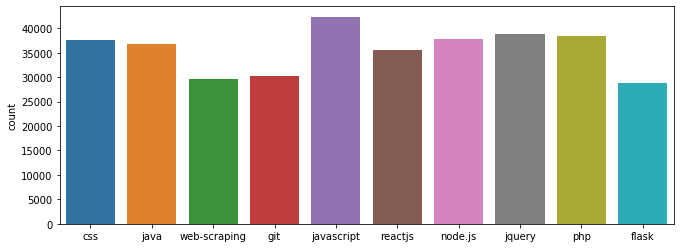

In [21]:
#Plotting a histogram
import seaborn as sns
plt.figure(figsize=(11,4))
sns.barplot(numeric,stats['count'])
plt.show()


In [22]:
#Data Distribution as per the number of tags.
sum_rows = data.iloc[:,1:].sum(axis=1)
sum_rows.max()

9

In [23]:
sum_rows = sum_rows.value_counts()
sum_rows

1    19699
2    18709
5    14457
6    13569
4    13327
3    12875
7     6064
8     1261
9       81
dtype: int64

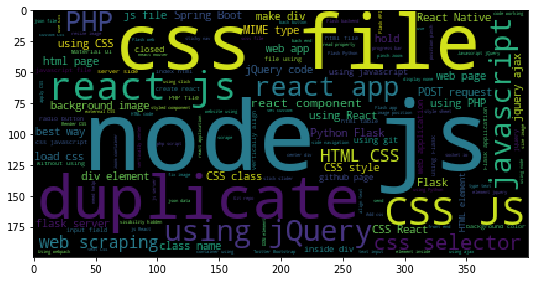

In [24]:
from wordcloud import WordCloud , STOPWORDS
plt.figure(figsize=(30,10))
row_ = 2
column_ = 2
index_ = 1

column = data[data['css']==1]
text = column.Questions.values
WC = WordCloud(stopwords = STOPWORDS,background_color='black').generate(" ".join(text))
plt.axis('off')
plt.title('flask')
plt.subplot(row_,column_,index_)
plt.plot()
plt.imshow(WC)


plt.show()


In [25]:
data.shape

(100042, 11)

In [26]:
#!pip3 install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0,100042):
    ques = re.sub('[^a-zA-Z]',' ',data['Questions'][i])
    ques = ques.lower()
    ques = ques.split()
    ques = [ps.stem(word) for word in ques if word not in set(stopwords.words('english'))]
    ques = ' '.join(ques)
    corpus.append(ques)

# print([x for x in corpus])

In [28]:
for i in range(0,10):
  print(corpus[i])
  

jqueri ajax request insid ajax request work
imag object chang one css click
error push heroku cannot find modul node linux x packag json
scrape data asp net page ajax pagin implement
remov particular element array javascript
jgit set git uri instead http remot circleci
link css html node js
sort multi dimension array valu
scrape data asp net page ajax pagin implement
use webpack exist php js project


In [0]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 2500)
x  = cv.fit_transform(corpus).toarray()


In [30]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
y = data.iloc[:,1:]
y.describe()

,css,java,web-scraping,git,javascript,reactjs,node.js,jquery,php,flask
count,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000,100042.000000
mean,0.375002,0.367975,0.296076,0.303113,0.423492,0.355601,0.378031,0.387707,0.383519,0.288129
std,0.484126,0.482257,0.456527,0.459606,0.494114,0.478697,0.484898,0.487230,0.486245,0.452894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=99)

In [33]:
print("X_TRAIN:",len(x_train))
print("X_TEST:",len(x_test))
print("Y_TRAIN:",len(y_train))
print("Y_TEST:",len(y_test))

X_TRAIN: 80033
X_TEST: 20009
Y_TRAIN: 80033
Y_TEST: 20009


In [34]:
print("X",type(x_train[0]))
print("Y",y_train.dtypes)

X <class 'numpy.ndarray'>
Y css             int64
java            int64
web-scraping    int64
git             int64
javascript      int64
reactjs         int64
node.js         int64
jquery          int64
php             int64
flask           int64
dtype: object


In [35]:
!pip3 install scikit-multilearn

     |████████████████████████████████| 92kB 3.4MB/s 


In [36]:
from skmultilearn.problem_transform import ClassifierChain
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#model = ClassifierChain(RandomForestClassifier(n_estimators = 100,n_jobs=-1))
model = ClassifierChain(GaussianNB())
model.fit(x_train,y_train)



ClassifierChain(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                order=None, require_dense=[True, True])

In [0]:
y_predict_gauss = model.predict(x_test)

In [38]:
from sklearn.metrics import hamming_loss,accuracy_score
print("The Hamming Loss is",hamming_loss(y_test,y_predict_gauss))

The Hamming Loss is 0.3554250587235744


In [40]:
from sklearn.ensemble import RandomForestClassifier
model_random = ClassifierChain(RandomForestClassifier(n_jobs=-1,n_estimators=100))
model.fit(x_train,y_train)



ClassifierChain(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                order=None, require_dense=[True, True])

In [41]:
y_predict_forest = model.predict(x_test)
print("The Hamming Loss is",hamming_loss(y_test,y_predict_forest))

The Hamming Loss is 0.3554250587235744


In [0]:
#trying out TF-Idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_tf = vect.fit_transform(corpus).toarray()

In [0]:
from sklearn.model_selection import train_test_split
x_train_tf,x_test_tf,y_train_tf,y_test_tf = train_test_split(x_tf,y,test_size = 0.2,random_state=99)

In [44]:
from skmultilearn.problem_transform import ClassifierChain
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#model = ClassifierChain(RandomForestClassifier(n_estimators = 100,n_jobs=-1))
model = ClassifierChain(GaussianNB())
model.fit(x_train_tf,y_train_tf)


ClassifierChain(classifier=GaussianNB(priors=None, var_smoothing=1e-09),
                order=None, require_dense=[True, True])

In [0]:
y_pred_tf_chain = model.predict(x_test_tf)

In [46]:
print("The Hamming Loss is",hamming_loss(y_test,y_pred_tf_chain))

The Hamming Loss is 0.4183517417162277
